#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

In [263]:
import numpy as np
import pandas as pd
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')


In [264]:
print(type(X_train))
print(X_train.shape)
print(X_train.ndim)
print(X_train)
print(X_train[:5,100:110])
print("/n")
print(type(y_train))
print(y_train.shape)
print(y_train.ndim)
print(y_train[:10])

<class 'numpy.ndarray'>
(60000, 784)
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 73   0   0   1   4   0   0   0   0   1]
 [198 200 200 200 200 201 200 225  41   0]
 [158  61  93  72   0   0   0   0   0   0]
 [140 140 137 133 125 169  75   0   0   0]
 [217 221 190   0   0   0   0   0   0   0]]
/n
<class 'numpy.ndarray'>
(60000,)
1
[9 0 0 3 0 2 7 2 5 5]


In [265]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
X_train_transformed1 = StandardScaler().fit_transform(X_train)
X_test_transformed1= StandardScaler().fit_transform(X_test)
print(X_train_transformed1)

[[-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 ...
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]]


In [266]:
#Feature Scaling by Normalization
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(X_test_normalized)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


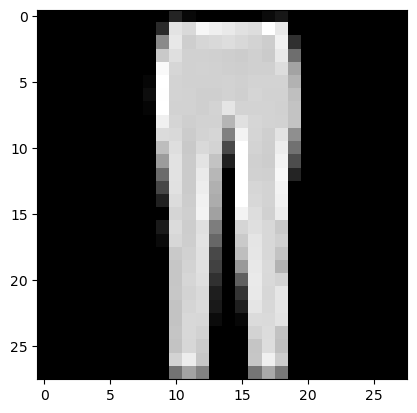

In [267]:
plt.imshow(X_test[555].reshape(28,28) / 255.0, cmap='gray')
plt.show()

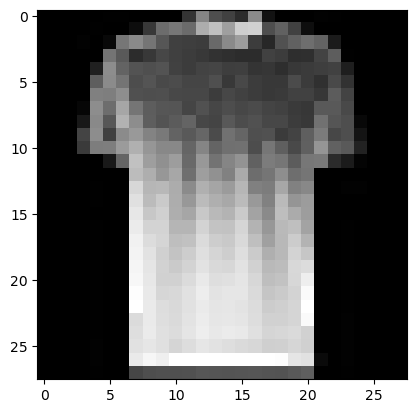

In [268]:
plt.imshow(X_test[235].reshape(28,28) / 255.0, cmap='gray')
plt.show()

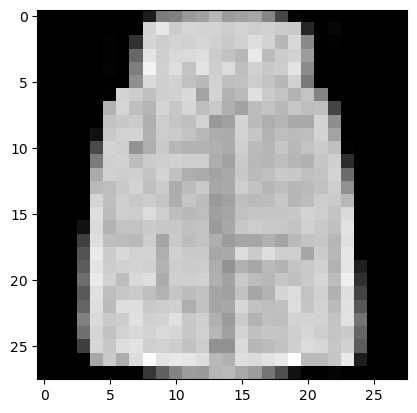

In [269]:
plt.imshow(X_test[4589].reshape(28,28) / 255.0, cmap='gray')
plt.show()

#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



Text(0.5, 1.0, 'Dress')

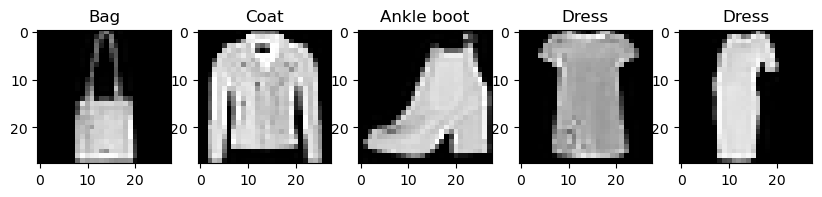

In [270]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
ax = axes.ravel()

label={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

label1 = label[y_train[200]]
label2 = label[y_train[4700]]
label3 = label[y_train[800]]
label4 = label[y_train[1600]]
label5 = label[y_train[2800]]

ax[0].imshow(X_train[200].reshape(28,28),cmap='gray')
ax[0].set_title(label1)
ax[1].imshow(X_train[4700].reshape(28,28),cmap='gray')
ax[1].set_title(label2)
ax[2].imshow(X_train[800].reshape(28,28),cmap='gray')
ax[2].set_title(label3)
ax[3].imshow(X_train[1600].reshape(28,28),cmap='gray')
ax[3].set_title(label4)
ax[4].imshow(X_train[2800].reshape(28,28),cmap='gray')
ax[4].set_title(label5)



#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

In [271]:
from sklearn.svm import SVC
scv_model = SVC(kernel = 'linear' , C= 0.025)
scv_model.fit(X_train[0:10000,:], y_train[0:10000])
y_label = scv_model.predict(X_test)
y_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(0.5, 1.0, 'Trouser(Shirt)')

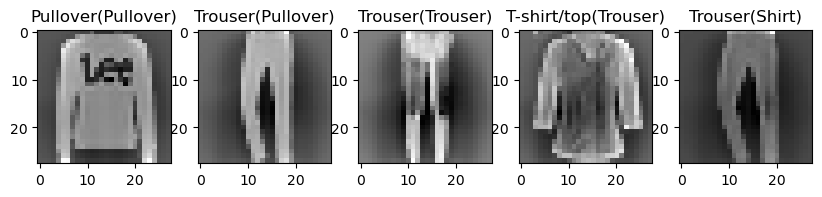

In [272]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
ax = axes.ravel()

label={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

true_label1 = label[y_test[1]]
true_label2 = label[y_test[2]]
true_label3 = label[y_test[3]]
true_label4 = label[y_test[4]]
true_label5 = label[y_test[5]]


pred_label1 = label[y_label[1]]
pred_label2 = label[y_label[2]]
pred_label3 = label[y_label[3]]
pred_label4 = label[y_label[4]]
pred_label5 = label[y_label[5]]


ax[0].imshow(X_test_transformed1[1].reshape(28,28),cmap='gray')
ax[0].set_title(f"{pred_label1}({(true_label0)})")
ax[1].imshow(X_test_transformed1[2].reshape(28,28),cmap='gray')
ax[1].set_title(f"{pred_label2}({(true_label1)})")
ax[2].imshow(X_test_transformed1[3].reshape(28,28),cmap='gray')
ax[2].set_title(f"{pred_label3}({(true_label2)})")
ax[3].imshow(X_test_transformed1[4].reshape(28,28),cmap='gray')
ax[3].set_title(f"{pred_label4}({(true_label3)})")
ax[4].imshow(X_test_transformed1[5].reshape(28,28),cmap='gray')
ax[4].set_title(f"{pred_label5}({(true_label4)})")


#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

In [273]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha=1, max_iter=1000)
mlp_model.fit(X_train[0:10000,:], y_train[0:10000])
y_label_mlp1 = mlp_model.predict(X_test)
y_label_mlp1

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [274]:
from sklearn.neural_network import MLPClassifier
mlp_model2 = MLPClassifier(alpha=1, max_iter=1000)
mlp_model2.fit(X_train, y_train)
y_label_mlp2 = mlp_model2.predict(X_test)
y_label_mlp2

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(0.5, 1.0, 'Shirt(Shirt)')

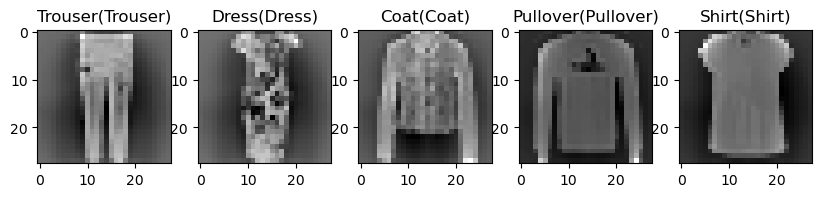

In [275]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
ax = axes.ravel()

label={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

true_label1 = label[y_test[200]]
true_label2 = label[y_test[100]]
true_label3 = label[y_test[10]]
true_label4 = label[y_test[115]]
true_label5 = label[y_test[765]]


pred_label1 = label[y_label_mlp2[200]]
pred_label2 = label[y_label_mlp2[100]]
pred_label3 = label[y_label_mlp2[10]]
pred_label4 = label[y_label_mlp2[115]]
pred_label5 = label[y_label_mlp2[765]]



ax[0].imshow(X_test_transformed1[200].reshape(28,28),cmap='gray')
ax[0].set_title(f"{pred_label1}({(true_label1)})")
ax[1].imshow(X_test_transformed1[100].reshape(28,28),cmap='gray')
ax[1].set_title(f"{pred_label2}({(true_label2)})")
ax[2].imshow(X_test_transformed1[10].reshape(28,28),cmap='gray')
ax[2].set_title(f"{pred_label3}({(true_label3)})")
ax[3].imshow(X_test_transformed1[115].reshape(28,28),cmap='gray')
ax[3].set_title(f"{pred_label4}({(true_label4)})")
ax[4].imshow(X_test_transformed1[765].reshape(28,28),cmap='gray')
ax[4].set_title(f"{pred_label5}({(true_label5)})")


In [276]:
from sklearn import metrics
print(
    f"              Classification report for MLP1 classifier:\n"
    f"{metrics.classification_report(y_test, y_label_mlp1)}\n"
)

              Classification report for MLP1 classifier:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1000
           1       0.94      0.97      0.95      1000
           2       0.70      0.69      0.70      1000
           3       0.80      0.83      0.82      1000
           4       0.65      0.79      0.72      1000
           5       0.97      0.89      0.93      1000
           6       0.60      0.52      0.56      1000
           7       0.91      0.92      0.91      1000
           8       0.94      0.93      0.94      1000
           9       0.90      0.95      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000




In [277]:
from sklearn import metrics
print(
    f"              Classification report for SVC classifier:\n"
    f"{metrics.classification_report(y_test, y_label)}\n"
)

              Classification report for SVC classifier:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.95      0.96      0.96      1000
           2       0.58      0.71      0.64      1000
           3       0.81      0.78      0.79      1000
           4       0.71      0.64      0.67      1000
           5       0.92      0.90      0.91      1000
           6       0.54      0.46      0.49      1000
           7       0.88      0.92      0.90      1000
           8       0.95      0.92      0.93      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000




Confusion matrix:
[[0.725 0.01  0.032 0.045 0.006 0.    0.166 0.    0.016 0.   ]
 [0.001 0.97  0.    0.019 0.005 0.    0.004 0.    0.001 0.   ]
 [0.012 0.008 0.689 0.026 0.203 0.    0.057 0.    0.005 0.   ]
 [0.017 0.036 0.03  0.835 0.029 0.    0.05  0.    0.003 0.   ]
 [0.001 0.001 0.093 0.063 0.794 0.    0.047 0.    0.001 0.   ]
 [0.001 0.    0.003 0.001 0.002 0.89  0.    0.049 0.008 0.046]
 [0.124 0.007 0.119 0.041 0.167 0.    0.519 0.    0.023 0.   ]
 [0.    0.    0.    0.    0.    0.02  0.    0.917 0.    0.063]
 [0.    0.002 0.014 0.014 0.008 0.004 0.017 0.007 0.934 0.   ]
 [0.    0.    0.    0.003 0.    0.007 0.    0.034 0.001 0.955]]


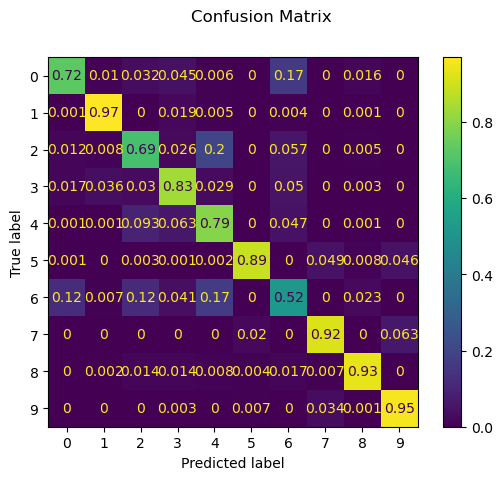

In [278]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_label_mlp1, normalize='true')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [279]:
from sklearn import metrics
print(
    f"         Classification report for MLP2 classifier:\n"
    f"{metrics.classification_report(y_test, y_label_mlp2)}\n"
)

         Classification report for MLP2 classifier:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.81      0.62      0.70      1000
           3       0.92      0.78      0.84      1000
           4       0.75      0.69      0.72      1000
           5       0.96      0.93      0.95      1000
           6       0.50      0.75      0.60      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.95      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000




Confusion matrix:
[[0.796 0.004 0.006 0.018 0.003 0.002 0.161 0.    0.01  0.   ]
 [0.003 0.964 0.007 0.014 0.004 0.    0.007 0.001 0.    0.   ]
 [0.013 0.002 0.616 0.004 0.125 0.    0.238 0.    0.002 0.   ]
 [0.038 0.023 0.01  0.778 0.051 0.001 0.085 0.    0.014 0.   ]
 [0.    0.001 0.067 0.016 0.692 0.    0.221 0.    0.003 0.   ]
 [0.    0.    0.    0.001 0.001 0.934 0.    0.047 0.004 0.013]
 [0.125 0.003 0.053 0.015 0.045 0.    0.747 0.    0.012 0.   ]
 [0.    0.    0.    0.    0.    0.009 0.    0.964 0.    0.027]
 [0.003 0.001 0.004 0.001 0.002 0.002 0.027 0.005 0.955 0.   ]
 [0.    0.    0.    0.    0.    0.023 0.002 0.036 0.    0.939]]


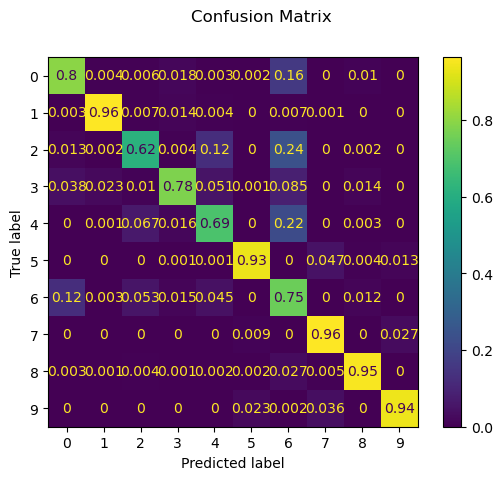

In [280]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_label_mlp2, normalize='true')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics. 

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

In [281]:
import numpy as np
import cv2 

In [282]:
#Sobel Edge detector
import numpy as np

X_train_reshaped = X_train.reshape(60000,28,28)
X_test_reshaped = X_test.reshape(10000,28,28)

ddepth = cv2.CV_64F
dx = 1 
dy = 0  

In [283]:
X_train_sobel = np.zeros((60000,28,28))
for i in range(60000):
    X_train_sobel[i] = cv2.Sobel(X_train_reshaped[i],ddepth, dx, dy)
    
X_test_sobel = np.zeros((10000,28,28))
for i in range(10000):
    X_test_sobel[i] = cv2.Sobel(X_test_reshaped[i],ddepth, dx, dy)
    
    
X_train_sobel = X_train_sobel.reshape(60000,784)
X_test_sobel = X_test_sobel.reshape(10000,784)

In [284]:
from sklearn.neural_network import MLPClassifier
mlp5 = MLPClassifier(alpha=1, max_iter=1000)
mlp5.fit(X_train_sobel[0:10000,:], y_train[0:10000])
y_pred = mlp5.predict(X_text_sobel)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(0.5, 1.0, 'Bag(Bag)')

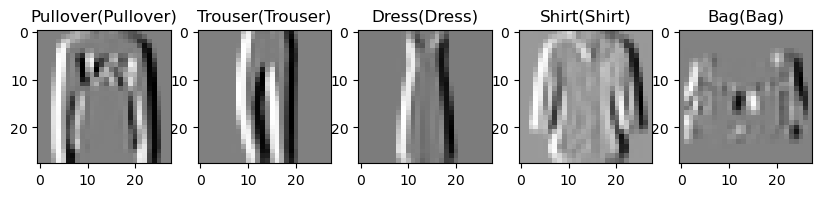

In [285]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
ax = axes.ravel()

label={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

true_label1 = label[y_test[1]]
true_label2 = label[y_test[2]]
true_label3 = label[y_test[13]]
true_label4 = label[y_test[4]]
true_label5 = label[y_test[95]]


pred_label1 = label[y_pred[1]]
pred_label2 = label[y_pred[2]]
pred_label3 = label[y_pred[13]]
pred_label4 = label[y_pred[4]]
pred_label5 = label[y_pred[95]]


ax[0].imshow(X_text_sobel[1].reshape(28,28),cmap='gray')
ax[0].set_title(f"{pred_label1}({(true_label1)})")
ax[1].imshow(X_text_sobel[2].reshape(28,28),cmap='gray')
ax[1].set_title(f"{pred_label2}({(true_label2)})")
ax[2].imshow(X_text_sobel[13].reshape(28,28),cmap='gray')
ax[2].set_title(f"{pred_label3}({(true_label3)})")
ax[3].imshow(X_text_sobel[4].reshape(28,28),cmap='gray')
ax[3].set_title(f"{pred_label4}({(true_label4)})")
ax[4].imshow(X_text_sobel[95].reshape(28,28),cmap='gray')
ax[4].set_title(f"{pred_label5}({(true_label5)})")

Classification report for classifier <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74      1000
           1       0.96      0.96      0.96      1000
           2       0.69      0.73      0.71      1000
           3       0.84      0.84      0.84      1000
           4       0.73      0.69      0.71      1000
           5       0.92      0.88      0.90      1000
           6       0.55      0.61      0.58      1000
           7       0.92      0.89      0.91      1000
           8       0.90      0.89      0.90      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000


Confusion matrix:
[[0.693 0.006 0.016 0.037 0.004 0.005 0.223 0.001 0.015 0.   ]
 [0.01  0.959 0.002 0.02  0.003 0.    0.002 0.    0

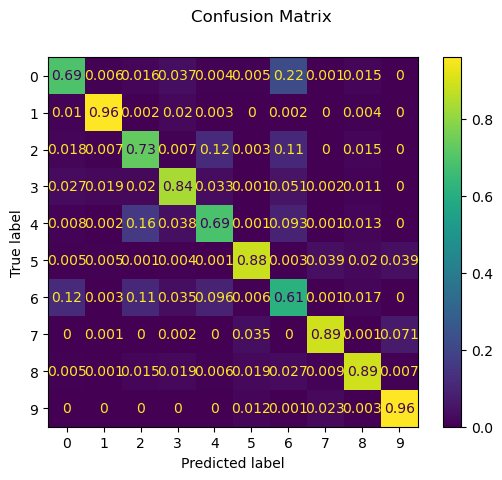

In [286]:
from sklearn import metrics
print(
    f"Classification report for classifier {MLPClassifier}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [287]:
#Bilateral filtering

X_train_blt = np.zeros((60000,28,28))
for i in range(60000):
    X_train_blt[i] = cv2.bilateralFilter(X_train_reshaped[i],9, 85, 85)
    
X_test_blt = np.zeros((10000,28,28))
for i in range(10000):
    X_test_blt[i] = cv2.bilateralFilter(X_text_reshaped[i],ddepth, dx, dy)

    
X_train_blt = X_train_blt.reshape(60000,784)
X_text_blt = X_test_blt.reshape(10000,784)
    
print(classification_report(y_test, y_pred_filtered))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.99      0.94      0.97      1000
           2       0.70      0.80      0.75      1000
           3       0.83      0.88      0.85      1000
           4       0.83      0.60      0.69      1000
           5       0.96      0.93      0.94      1000
           6       0.55      0.63      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.97      0.94      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [288]:
from sklearn.neural_network import MLPClassifier
mlp05 = MLPClassifier(alpha=1, max_iter=1000)
mlp05.fit(X_train_blt[0:10000,:], y_train[0:10000])
y_pred1 = mlp05.predict(X_text_blt)
y_pred1

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(0.5, 1.0, 'T-shirt/top(T-shirt/top)')

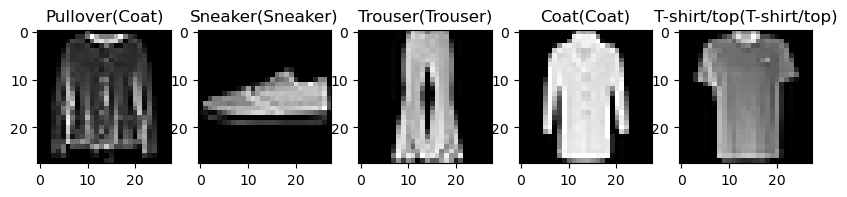

In [289]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
ax = axes.ravel()

label={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

true_label1 = label[y_test[25]]
true_label2 = label[y_test[60]]
true_label3 = label[y_test[192]]
true_label4 = label[y_test[435]]
true_label5 = label[y_test[720]]


pred_label1 = label[y_pred1[25]]
pred_label2 = label[y_pred1[60]]
pred_label3 = label[y_pred1[192]]
pred_label4 = label[y_pred1[435]]
pred_label5 = label[y_pred1[720]]


ax[0].imshow(X_text_blt[25].reshape(28,28),cmap='gray')
ax[0].set_title(f"{pred_label1}({(true_label1)})")
ax[1].imshow(X_text_blt[60].reshape(28,28),cmap='gray')
ax[1].set_title(f"{pred_label2}({(true_label2)})")
ax[2].imshow(X_text_blt[192].reshape(28,28),cmap='gray')
ax[2].set_title(f"{pred_label3}({(true_label3)})")
ax[3].imshow(X_text_blt[435].reshape(28,28),cmap='gray')
ax[3].set_title(f"{pred_label4}({(true_label4)})")
ax[4].imshow(X_text_blt[720].reshape(28,28),cmap='gray')
ax[4].set_title(f"{pred_label5}({(true_label5)})")

    Classification report for classifier :
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.90      0.96      0.93      1000
           2       0.74      0.65      0.69      1000
           3       0.85      0.80      0.82      1000
           4       0.64      0.82      0.72      1000
           5       0.95      0.90      0.92      1000
           6       0.63      0.52      0.57      1000
           7       0.92      0.88      0.90      1000
           8       0.92      0.94      0.93      1000
           9       0.86      0.96      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Confusion matrix:
[[0.704 0.004 0.027 0.053 0.01  0.001 0.194 0.    0.007 0.   ]
 [0.005 0.963 0.005 0.019 0.005 0.    0.003 0.    0.    0.   ]
 [0.006 0.002 0.745 0.021 0.079 0.    0.143 0.    0.0

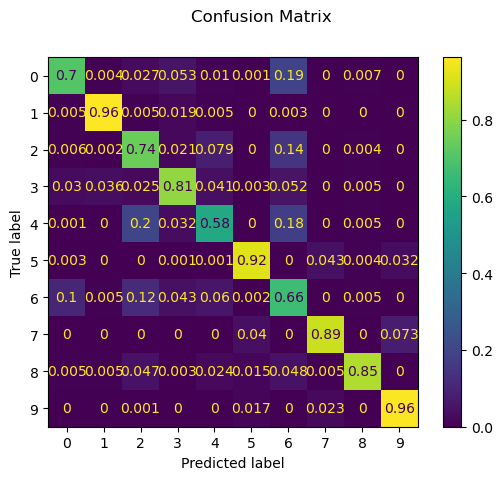

In [290]:
from sklearn import metrics
print(
    f"    Classification report for classifier :\n"
    f"{metrics.classification_report(y_test, y_pred1)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred0, normalize='true')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [291]:
# Calculate accuracy scores
accuracy_sobel = accuracy_score(y_test, y_pred)
accuracy_filtered = accuracy_score(y_test, y_pred1)
accuracy_original = accuracy_score(y_test, y_label_mlp2)

print("Accuracy for Sobel edge-detected images:", accuracy_sobel)
print("Accuracy for Bilaterally filtered images:", accuracy_filtered)
print("Accuracy for Original Images", accuracy_original)


Accuracy for Sobel edge-detected images: 0.814
Accuracy for Bilaterally filtered images: 0.8183
Accuracy for Original Images 0.8385
